# SLR Assignment Problem 1
1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike
------------------------------------------------------------
Build a simple linear regression model by performing EDA and 
do necessary transformations and select the best model using R or Python.

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf

In [2]:
dt=pd.read_csv("delivery_time.csv")

In [3]:
dt.shape

(21, 2)

In [63]:
dt.sample(6)

,DeliveryTime,SortingTime
17,18.11,7
10,19.83,8
19,17.83,7
14,12.03,3
0,21.00,10
16,13.75,6


In [5]:
dt.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
dt = dt.rename(columns = {"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"})

In [8]:
dt.sample(5)

,DeliveryTime,SortingTime
4,29.00,10
15,14.88,4
16,13.75,6
7,9.50,3
12,16.68,7


In [56]:
model=smf.ols('DeliveryTime~SortingTime',data=dt).fit()
model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        11:21:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'DT')

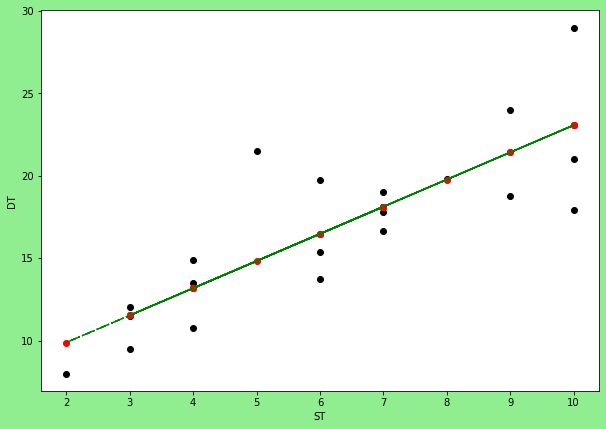

In [57]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt.SortingTime,dt.DeliveryTime,color="black",label="actual");
plt.plot(dt.SortingTime,model.predict(),label="predicted",color="green",linestyle="-.");
plt.scatter(dt.SortingTime,model.predict(),color="red")
plt.xlabel("ST");
plt.ylabel("DT")

In [11]:
model1=smf.ols('np.log(DeliveryTime)~SortingTime',data=dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Thu, 24 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                          11:21:59   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model2=smf.ols('np.exp(DeliveryTime)~SortingTime',data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.exp(DeliveryTime)   R-squared:                       0.119
Model:                              OLS   Adj. R-squared:                  0.073
Method:                   Least Squares   F-statistic:                     2.572
Date:                  Thu, 24 Nov 2022   Prob (F-statistic):              0.125
Time:                          11:22:00   Log-Likelihood:                -604.98
No. Observations:                    21   AIC:                             1214.
Df Residuals:                        19   BIC:                             1216.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.324e+11   4.84e+11     -1.099      0.285   -1.55e+12    4.81e+11
SortingTime  1.165e+11   7.26e+10      1.604      0.125   -3.55e+10    2.69e+11
==============================================================================
Omnibus:                       44.249   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.022
Skew:                           3.442   Prob(JB):                     1.47e-36
Kurtosis:                      14.883   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model2=smf.ols('(DeliveryTime*DeliveryTime)~SortingTime',data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        11:22:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model3=smf.ols('np.log(DeliveryTime)~np.log(SortingTime)',data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Thu, 24 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                          11:22:02   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(SortingTime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
Y_pred=model3.predict()
print (Y_pred)

[3.1178331  2.57032892 2.81260338 3.05487783 3.1178331  2.81260338
 2.90471185 2.39843246 3.1178331  3.05487783 2.98449984 2.57032892
 2.90471185 2.39843246 2.39843246 2.57032892 2.81260338 2.90471185
 2.15615801 2.90471185 2.70366218]


Text(0, 0.5, 'DT')

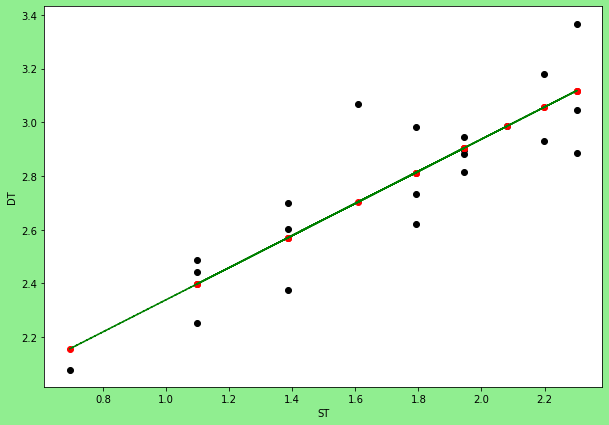

In [60]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(np.log(dt.SortingTime),np.log(dt.DeliveryTime),color="black",label="actual");
plt.plot(np.log(dt.SortingTime),model3.predict(),label="predicted",color="green",linestyle="-.");
plt.scatter(np.log(dt.SortingTime),model3.predict(),color="red")
plt.xlabel("ST");
plt.ylabel("DT")

# AAssignment 2-Salary Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [42]:
#Salary Data=sd
sd=pd.read_csv("Salary_Data.csv")
print(sd.sample(5))
print("***"*15)
print("Data Shape",sd.shape)

    YearsExperience   Salary
6               3.0  60150.0
1               1.3  46205.0
18              5.9  81363.0
19              6.0  93940.0
5               2.9  56642.0
*********************************************
Data Shape (30, 2)


In [43]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [47]:
model=smf.ols(('sd.YearsExperience~sd.Salary'),data=sd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sd.YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        11:57:51   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
sd.Salary      0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
model1=smf.ols(('sd.YearsExperience~np.log(sd.Salary)'),data=sd).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sd.YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.03e-18
Time:                        12:00:16   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(sd.Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
Y_pred=model.predict()
print(Y_pred)

[ 1.60093427  2.29581922  1.43769402  2.02442725  1.65642785  3.35272891
  3.70796884  3.13024825  4.14290484  3.40812122  4.01865188  3.26685563
  3.38462759  3.39718453  3.80528514  4.49662579  4.30330965  6.03080053
  5.85611727  7.12973546  6.90674848  7.56851956  7.87525325  9.14208664
  8.69844179  8.30867027  9.46178233  9.02289696 10.01084473  9.95828786]


In [ ]:
#Since we got best r^2 from the given data and the r^2 we got post transformation is lowring we can process with initial data

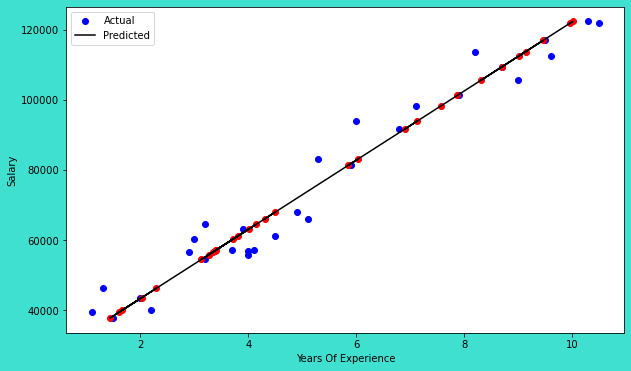

In [73]:
plt.figure(figsize=(10,6),facecolor="turquoise", label="Given Model is the Best")
plt.scatter(sd.YearsExperience,sd.Salary,color="blue",label="Actual")
plt.scatter(Y_pred,sd.Salary,color="red")
plt.plot(Y_pred,sd.Salary,color="black",linestyle="-",label="Predicted")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.legend(loc='best')
plt.show()